In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

file_path_1 = "/content/drive/MyDrive/models_cc/subsets/mnist_client2_train.parquet"
file_path_2 = "/content/drive/MyDrive/models_cc/subsets/mnist_client2_test.parquet"
df_train = pd.read_parquet(file_path_1)
df_test = pd.read_parquet(file_path_2)

In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import random

# Seed everything for reproducibility
def set_seed(seed=42):
    tf.keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()
    np.random.seed(seed)
    random.seed(seed)

set_seed(42)

def prepare_data(df_train, df_test):
    # Extract features (pixel values) and labels
    X_train = df_train.drop('label', axis=1).values
    y_train = df_train['label'].values
    X_test = df_test.drop('label', axis=1).values
    y_test = df_test['label'].values

    # Reshape to (num_samples, 28, 28, 1) and normalize
    X_train = np.expand_dims(X_train.reshape(-1, 28, 28) / 255.0, -1)
    X_test = np.expand_dims(X_test.reshape(-1, 28, 28) / 255.0, -1)

    return (X_train, y_train), (X_test, y_test)

def train_and_verify(model, x_train, y_train, epochs, x_test, y_test, save_name):
    print(model.summary())

    # Train the model
    history = model.fit(x_train, y_train,
                       epochs=epochs,
                       validation_data=(x_test, y_test))

    # Make predictions and print classification report
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    # Create training plots
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Save the model
    model.save(save_name)
    print(f"Model saved as {save_name}")


In [13]:
import tensorflow as tf

class build:
    @staticmethod
    def build_it():
        model = tf.keras.Sequential([
            tf.keras.Input(shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 110s 108ms/step - accuracy: 0.8886 - loss: 0.3568 - val_accuracy: 0.9790 - val_loss: 0.0719
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 110s 110ms/step - accuracy: 0.9822 - loss: 0.0564 - val_accuracy: 0.9825 - val_loss: 0.0603
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 140s 108ms/step - accuracy: 0.9906 - loss: 0.0304 - val_accuracy: 0.9787 - val_loss: 0.0807
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 138s 104ms/step - accuracy: 0.9908 - loss: 0.0247 - val_accuracy: 0.9821 - val_loss: 0.0654
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 140s 102ms/step - accuracy: 0.9939 - loss: 0.0178 - val_accuracy: 0.9831 - val_loss: 0.0689
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       790
           1       1.00      0.98      0.99       899
           2       0.98      0.98      0.98       794
           3       0.99      0.98      0.99       818
           4     

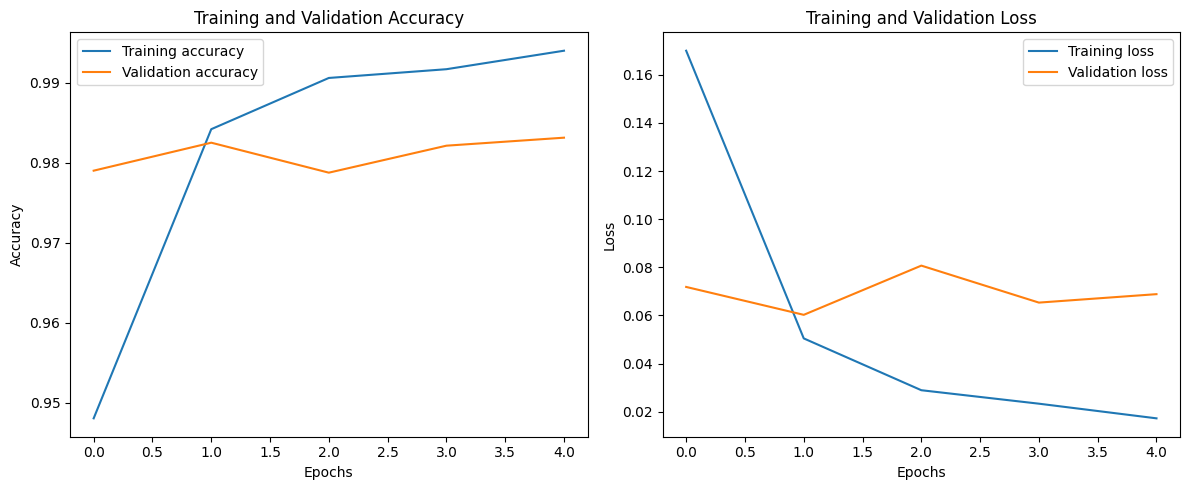

Model saved as my_model_rogelio.keras


In [14]:

# Prepare your data
train_data, test_data = prepare_data(df_train, df_test)
x_train, y_train = train_data
x_test, y_test = test_data

# Build and train a single model
model = build.build_it()
train_and_verify(model, x_train, y_train, 5, x_test, y_test, "my_model_rogelio.keras")
